In [10]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from evatuation import visualize_results
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.exceptions import FitFailedWarning
import numpy as np
import matplotlib.pyplot as plt

# Tắt tất cả các cảnh báo từ sklearn và các cảnh báo khác
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [11]:
import os
from settings import BASE_DIR
from data import processing_data
# Loading our dataset

data_path = os.path.join(BASE_DIR, "dataset", "movies_data_processed_v3.csv")
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.705882,8.824825,16.662455,3
1,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",17.281246,11.580593,16.740635,3
2,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",18.315320,12.206078,19.992952,9
3,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,25000000.0,"France, United Kingdom",17.034386,13.169249,19.391157,8
4,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",17.822844,12.180760,19.520887,8


In [12]:
def train_best_gb_model(X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'):
    """
    Huấn luyện GradientBoostingRegressor với GridSearchCV và trả về mô hình tốt nhất.
    
    Parameters:
        X_train (ndarray): Dữ liệu huấn luyện đầu vào (đã chuẩn hóa).
        y_train (ndarray): Nhãn huấn luyện.
        cv (int): Số lượng folds dùng trong cross-validation.
        scoring (str): Chiến lược đánh giá. Mặc định là RMSE âm (để chọn RMSE nhỏ nhất).
    
    Returns:
        best_model (GradientBoostingRegressor): Mô hình tốt nhất sau khi tìm kiếm.
        best_params (dict): Bộ tham số tốt nhất.
    """
    
    # Tham số tìm kiếm cho GradientBoostingRegressor
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [5, 10, 20],
        'min_samples_leaf': [3, 5, 10],
        'subsample': [0.8, 0.9, 1.0],
        'max_features': ['auto', 'sqrt', 0.8]  # Giới hạn số lượng đặc trưng
    }

    # Mô hình cơ sở
    base_model = GradientBoostingRegressor(random_state=42)

    # GridSearchCV với mô hình GradientBoostingRegressor
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        verbose=1,
        n_jobs=-1
    )

    # Huấn luyện mô hình và tìm kiếm tham số tốt nhất
    grid_search.fit(X_train, y_train)

    print("✅ Best Parameters from Grid Search:")
    print(grid_search.best_params_)

    return grid_search.best_estimator_, grid_search.best_params_



🔁 Fold 1
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
✅ Best Parameters from Grid Search:
{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 200, 'subsample': 0.8}
Training Metrics
R2 score: 0.6346
MSE: 26,399,861,501,017,180.0000
MLSE: 2.8275
MAPE: 40.90%
MAE: 68,675,728.8964
Test Metrics
R2 score: 0.5910
MSE: 24,260,248,105,699,236.0000
MLSE: 3.4184
MAPE: 57.54%
MAE: 70,352,591.4219


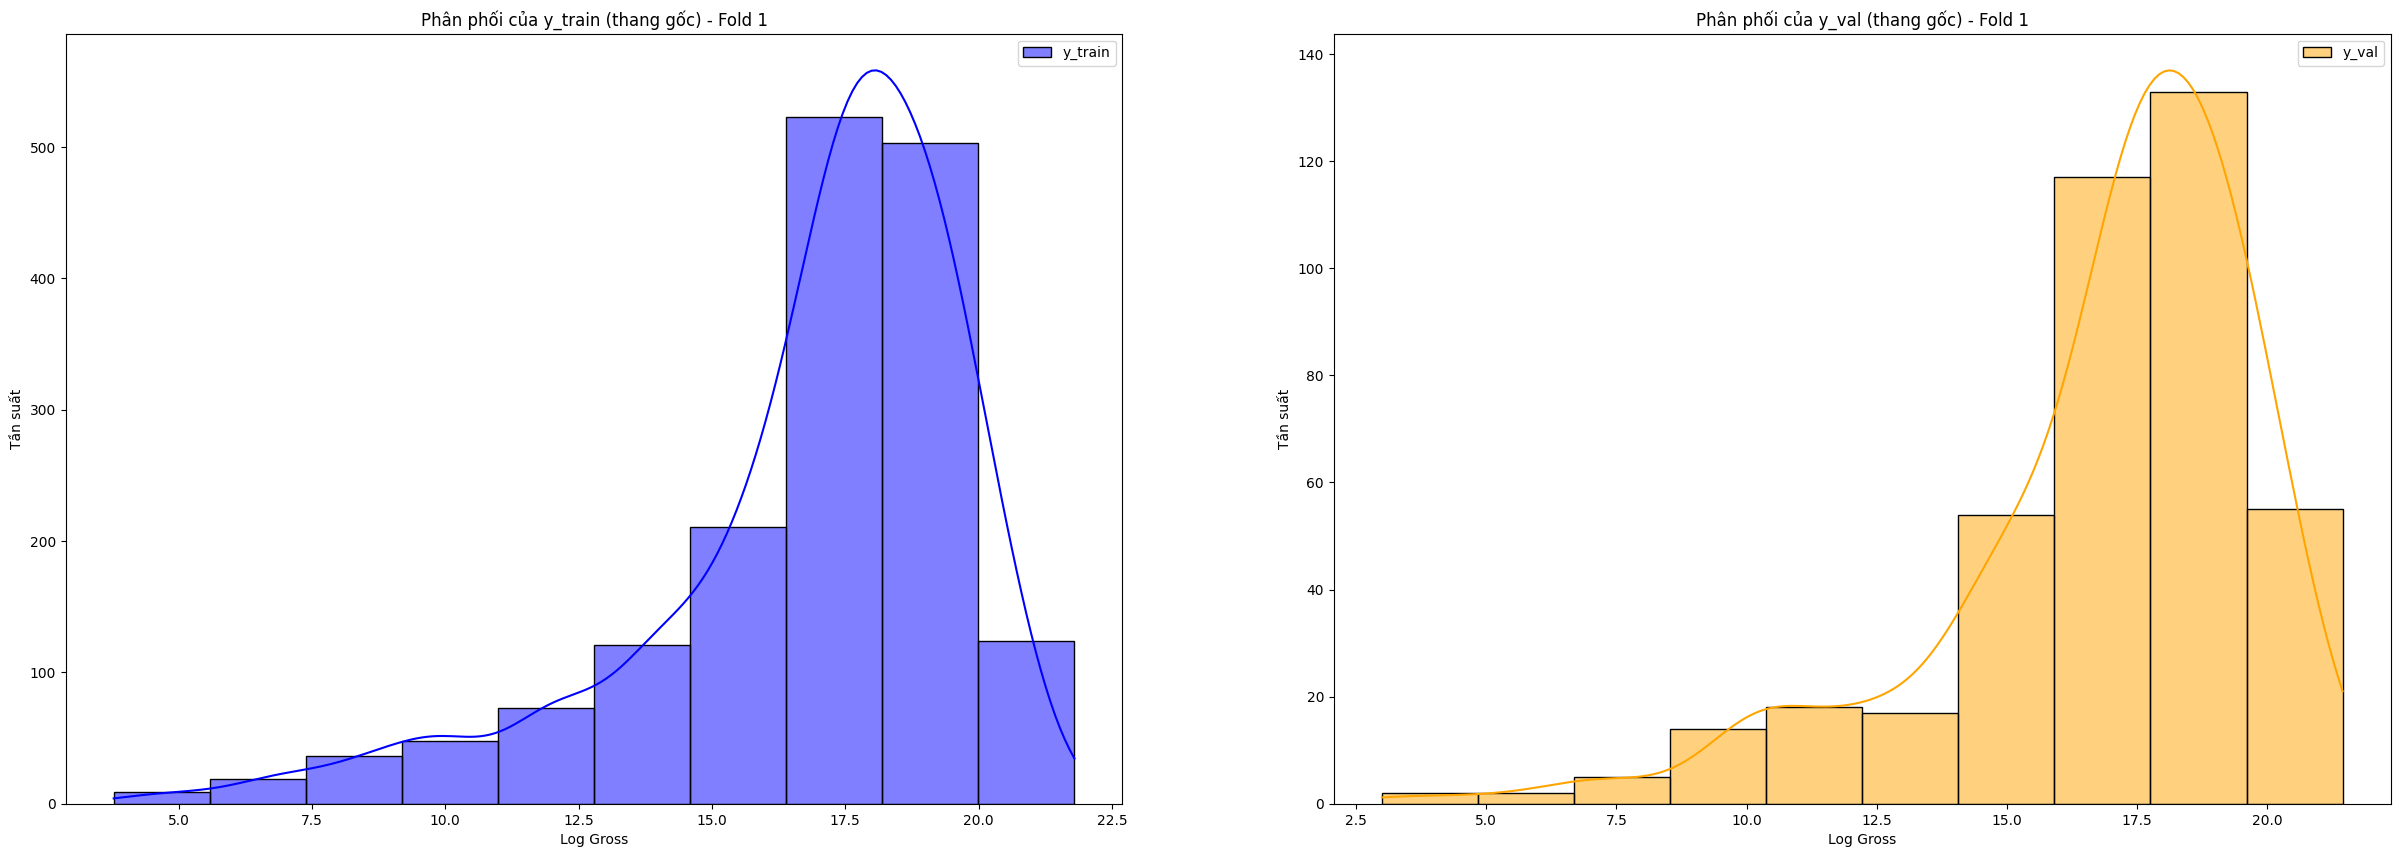

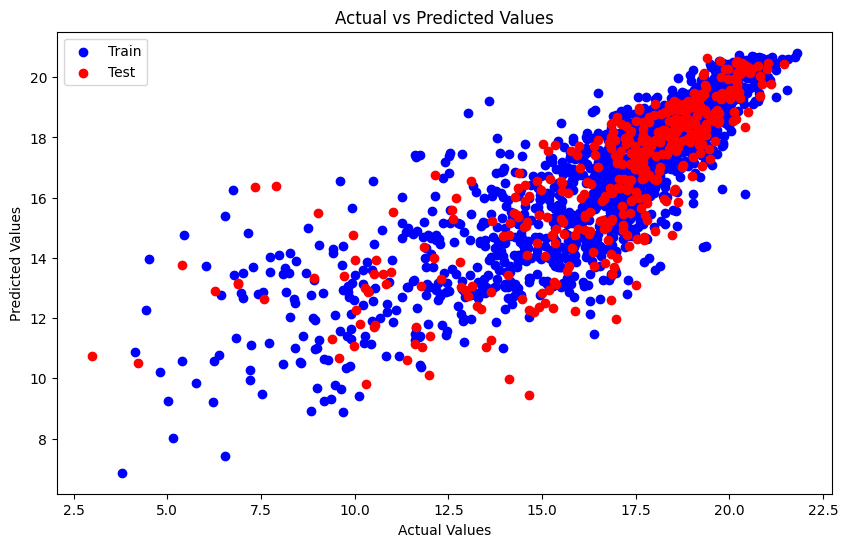

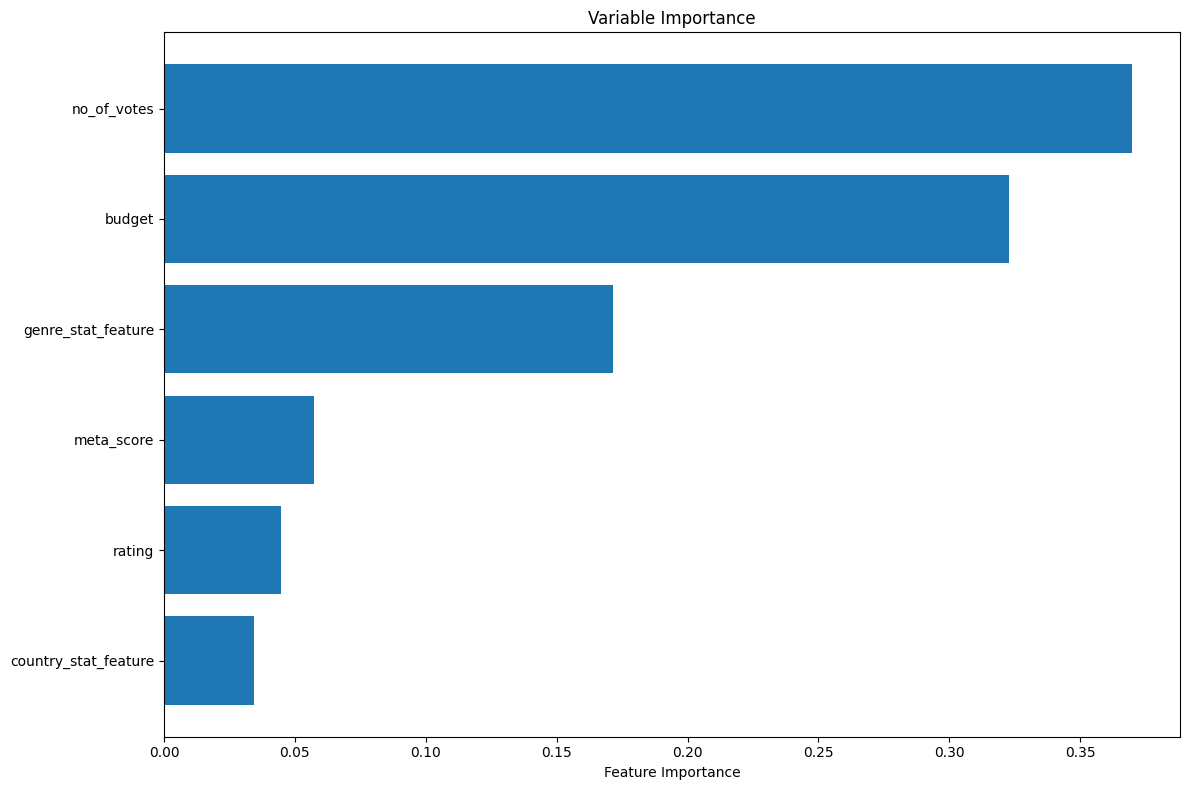

Fold 1 completed.

🔁 Fold 2
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
✅ Best Parameters from Grid Search:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.9}
Training Metrics
R2 score: 0.7074
MSE: 19,795,629,243,827,032.0000
MLSE: 2.3278
MAPE: 20.52%
MAE: 61,817,962.6697
Test Metrics
R2 score: 0.5628
MSE: 33,962,943,781,121,664.0000
MLSE: 4.0664
MAPE: 177.54%
MAE: 73,519,899.8493


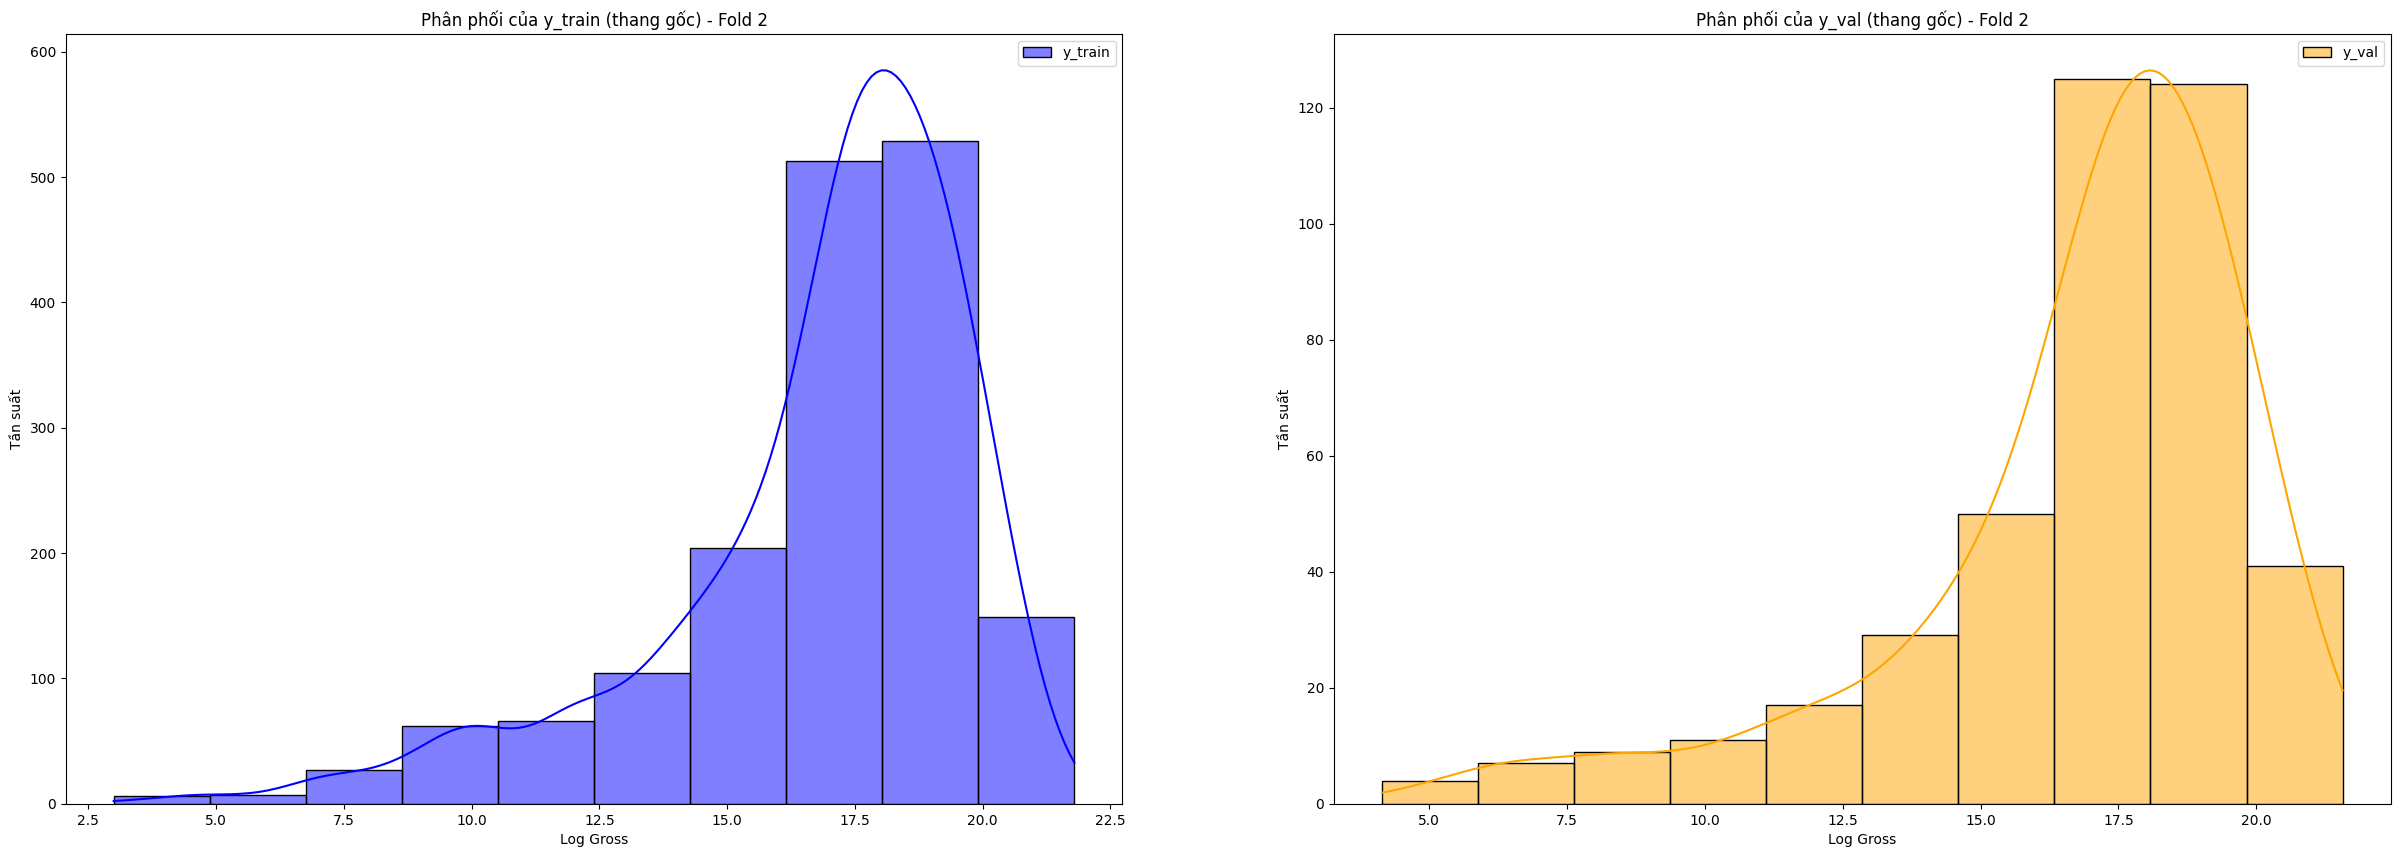

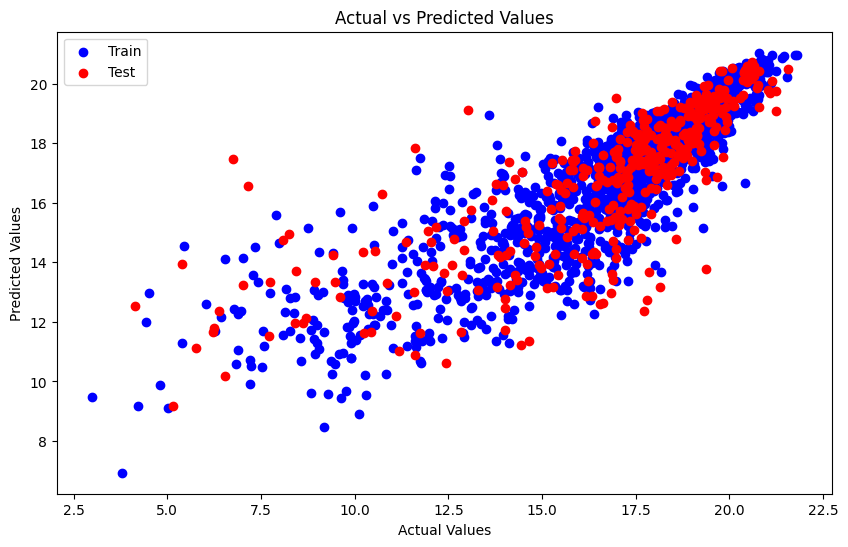

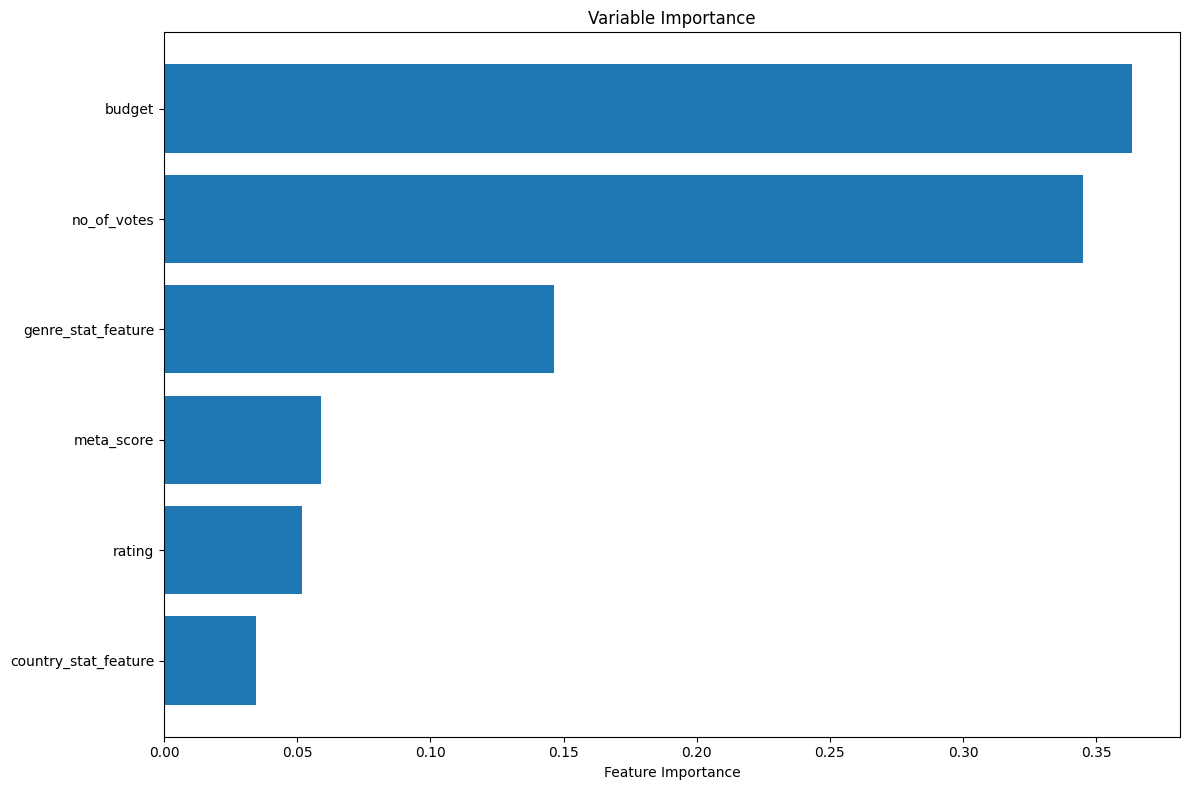

Fold 2 completed.

🔁 Fold 3
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
✅ Best Parameters from Grid Search:
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Training Metrics
R2 score: 0.6074
MSE: 24,449,941,045,821,448.0000
MLSE: 2.6890
MAPE: 34.97%
MAE: 67,633,764.3006
Test Metrics
R2 score: 0.4894
MSE: 50,620,981,220,030,472.0000
MLSE: 3.0717
MAPE: 23.74%
MAE: 86,582,445.6632


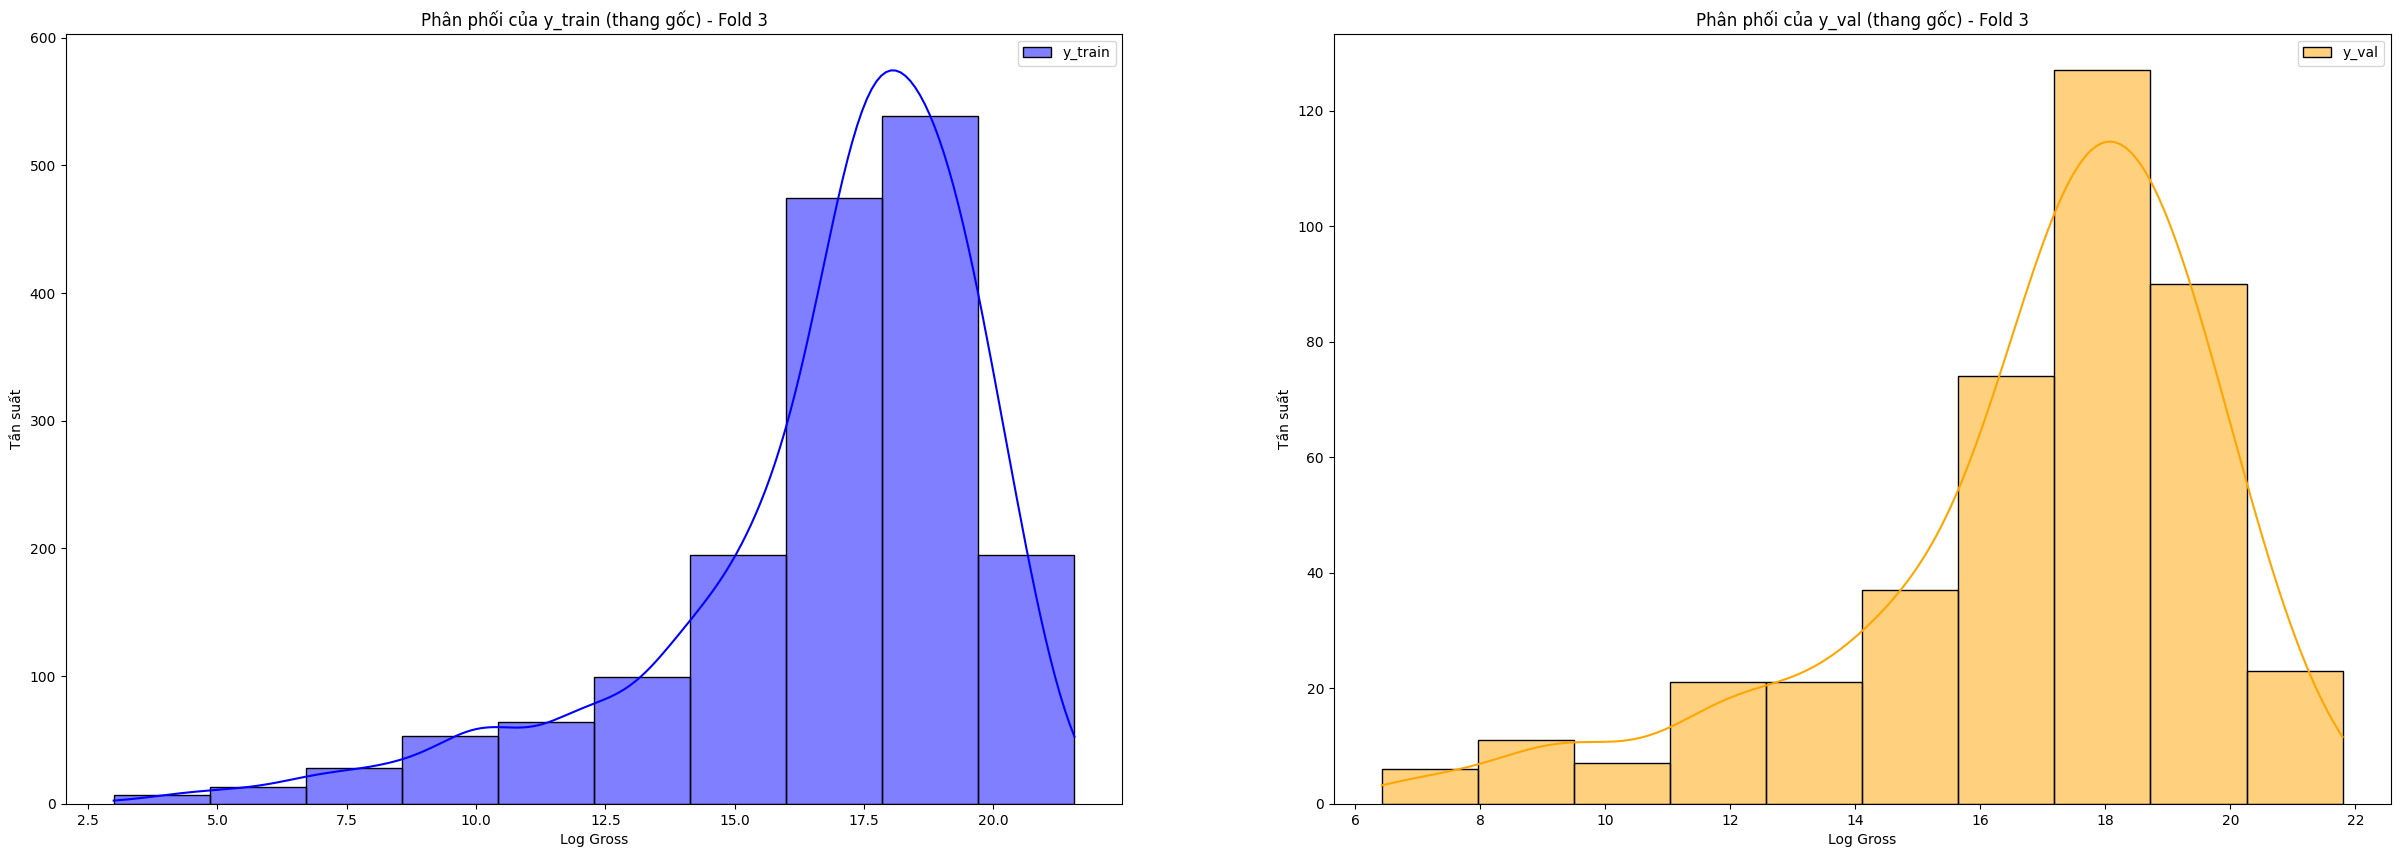

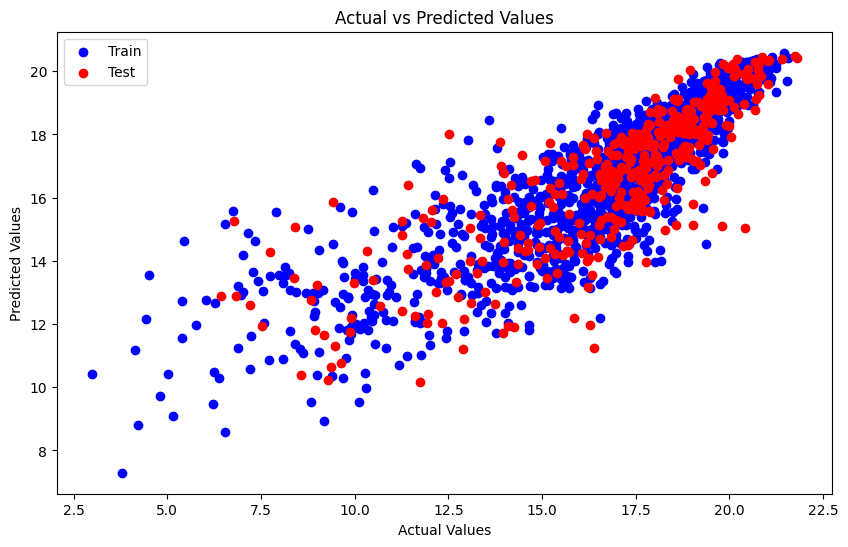

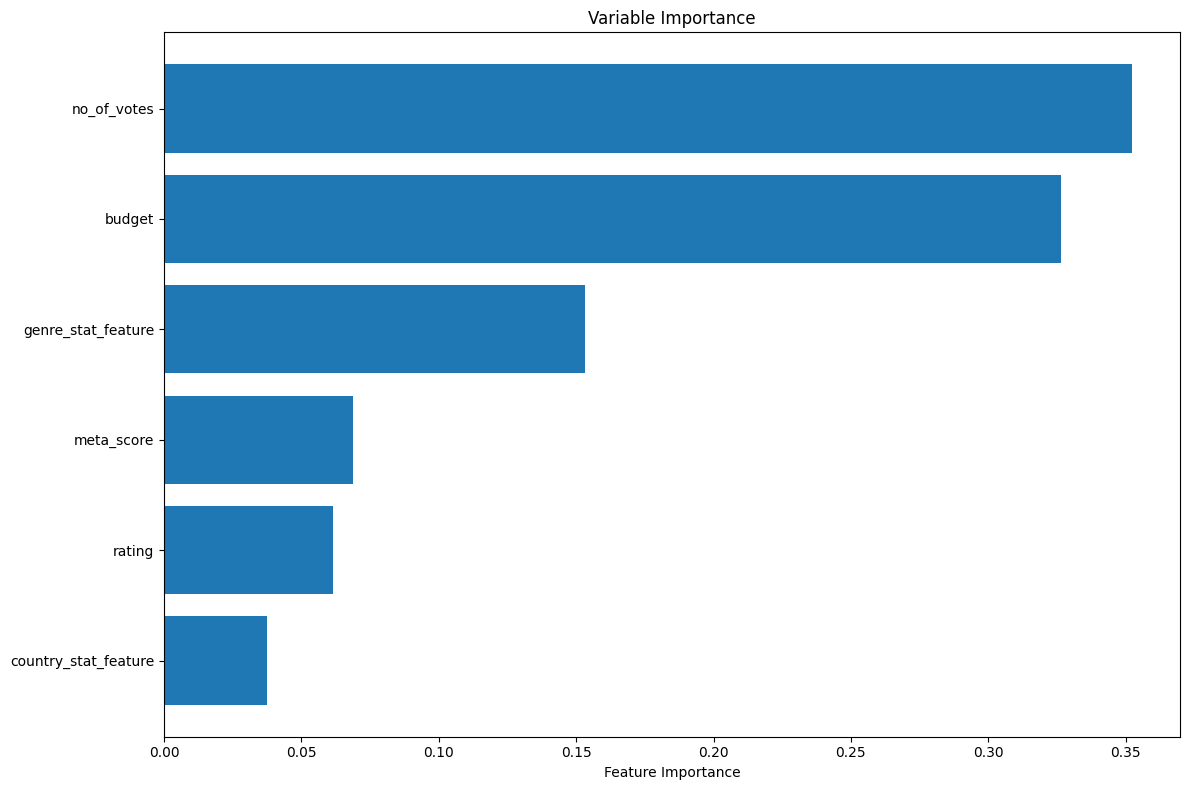

Fold 3 completed.

🔁 Fold 4
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
✅ Best Parameters from Grid Search:
{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 1.0}
Training Metrics
R2 score: 0.6665
MSE: 24,763,852,615,075,596.0000
MLSE: 2.3154
MAPE: 21.64%
MAE: 67,044,075.8772
Test Metrics
R2 score: 0.6560
MSE: 17,632,099,741,578,044.0000
MLSE: 4.3600
MAPE: 196.21%
MAE: 67,163,009.1161


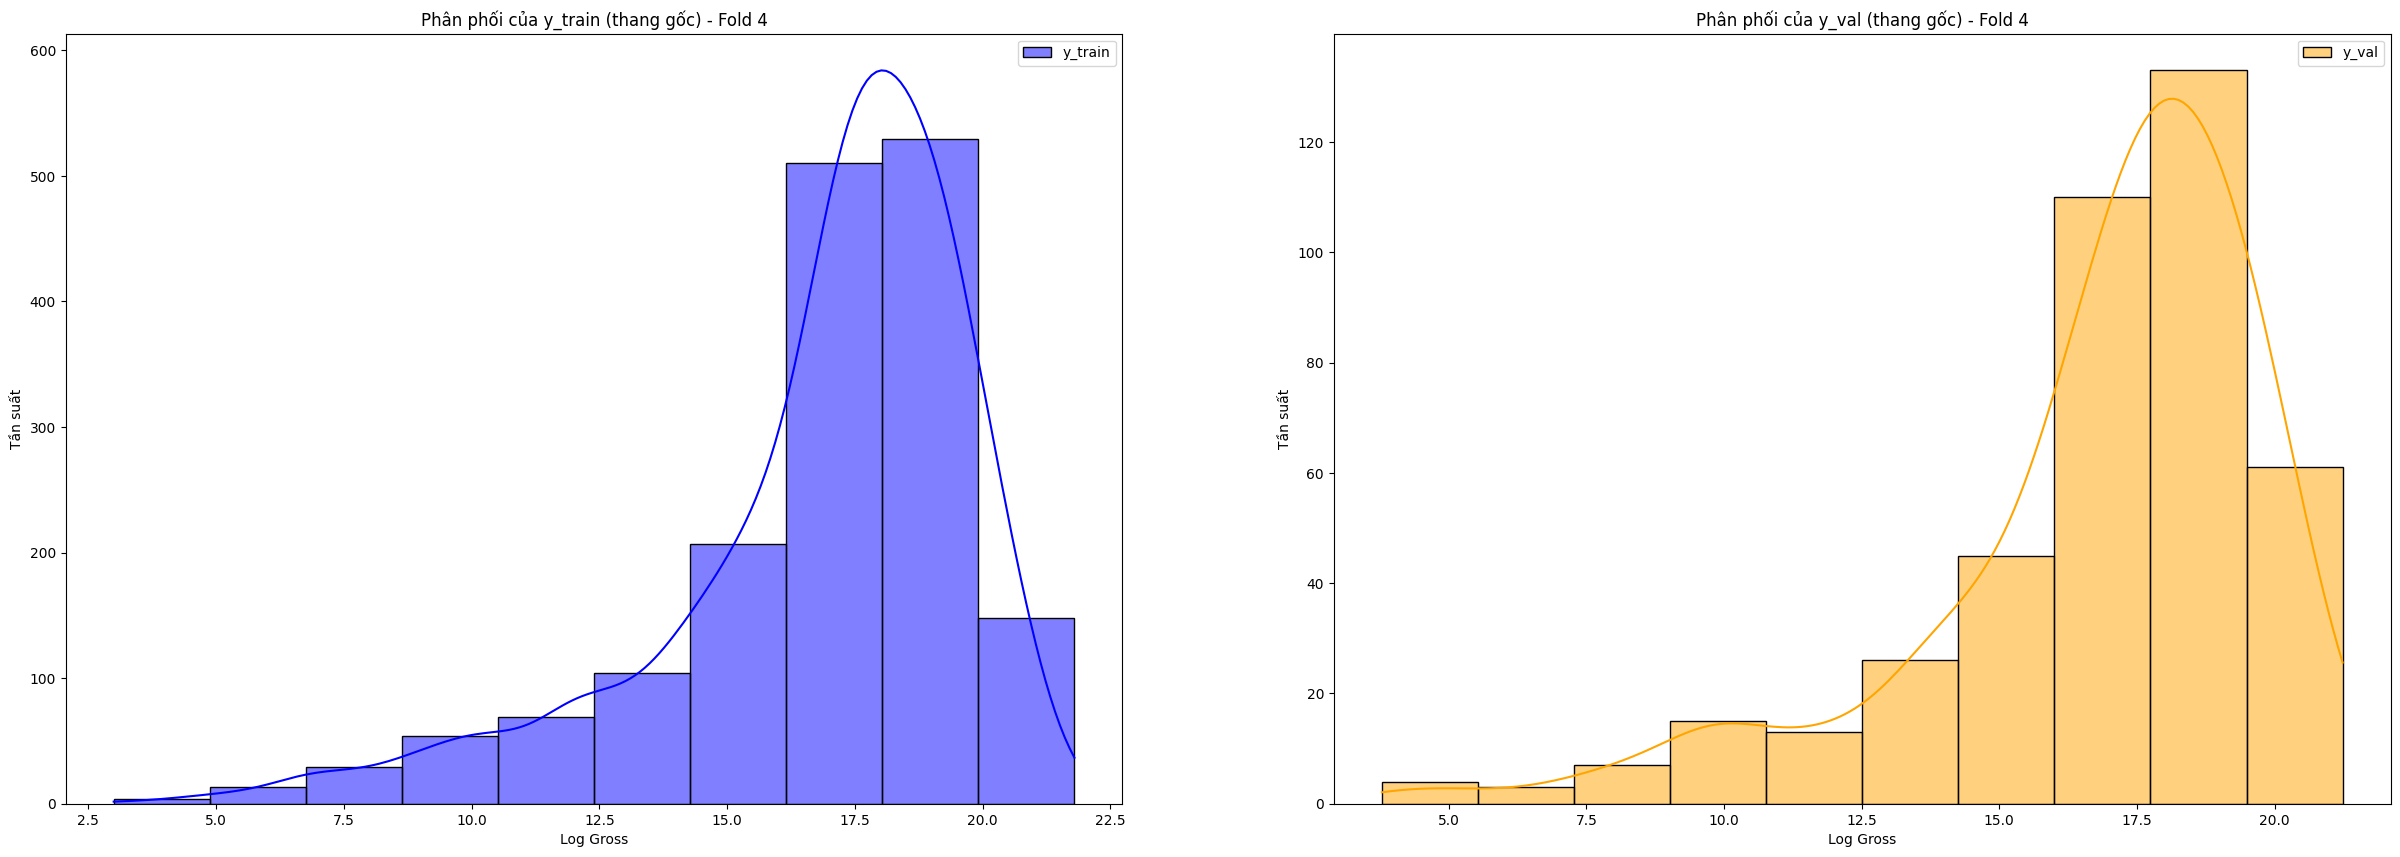

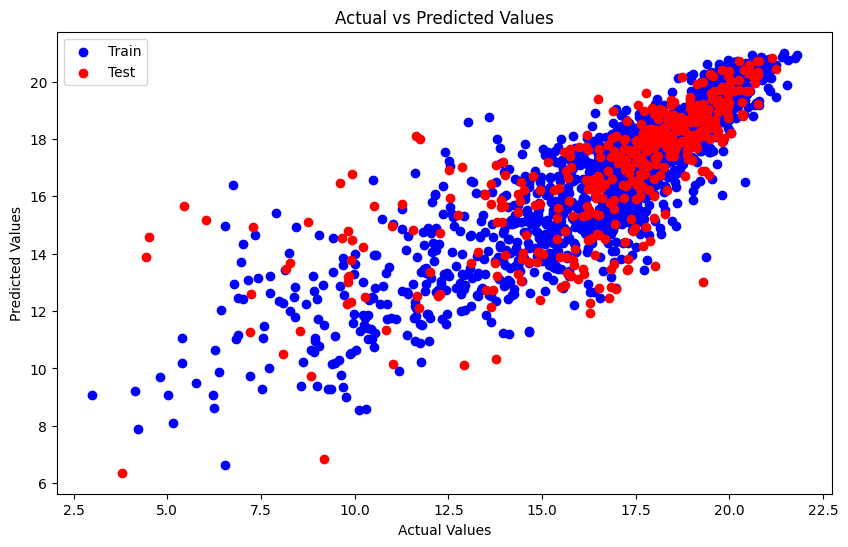

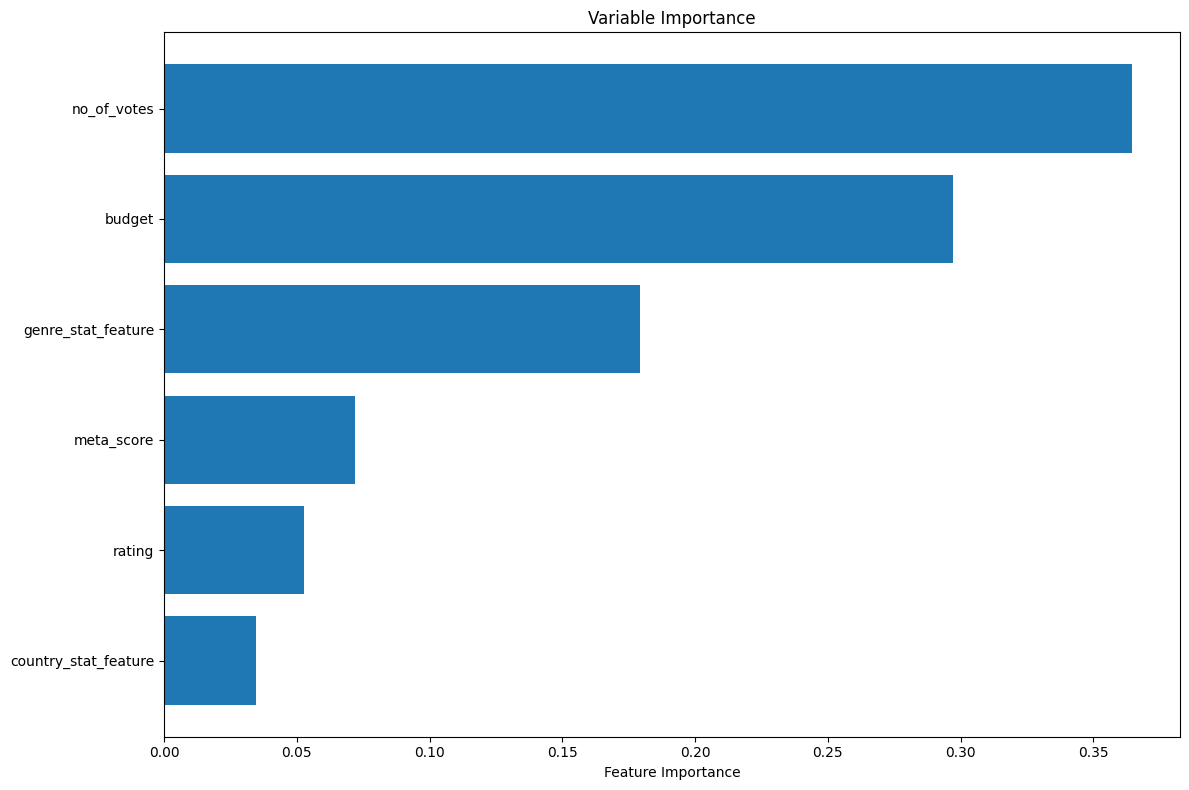

Fold 4 completed.

🔁 Fold 5
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
✅ Best Parameters from Grid Search:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.9}
Training Metrics
R2 score: 0.7177
MSE: 20,297,187,351,087,756.0000
MLSE: 1.9520
MAPE: 14.90%
MAE: 60,435,623.9779
Test Metrics
R2 score: 0.5747
MSE: 25,830,579,723,500,740.0000
MLSE: 4.2614
MAPE: 96.10%
MAE: 72,613,432.9145


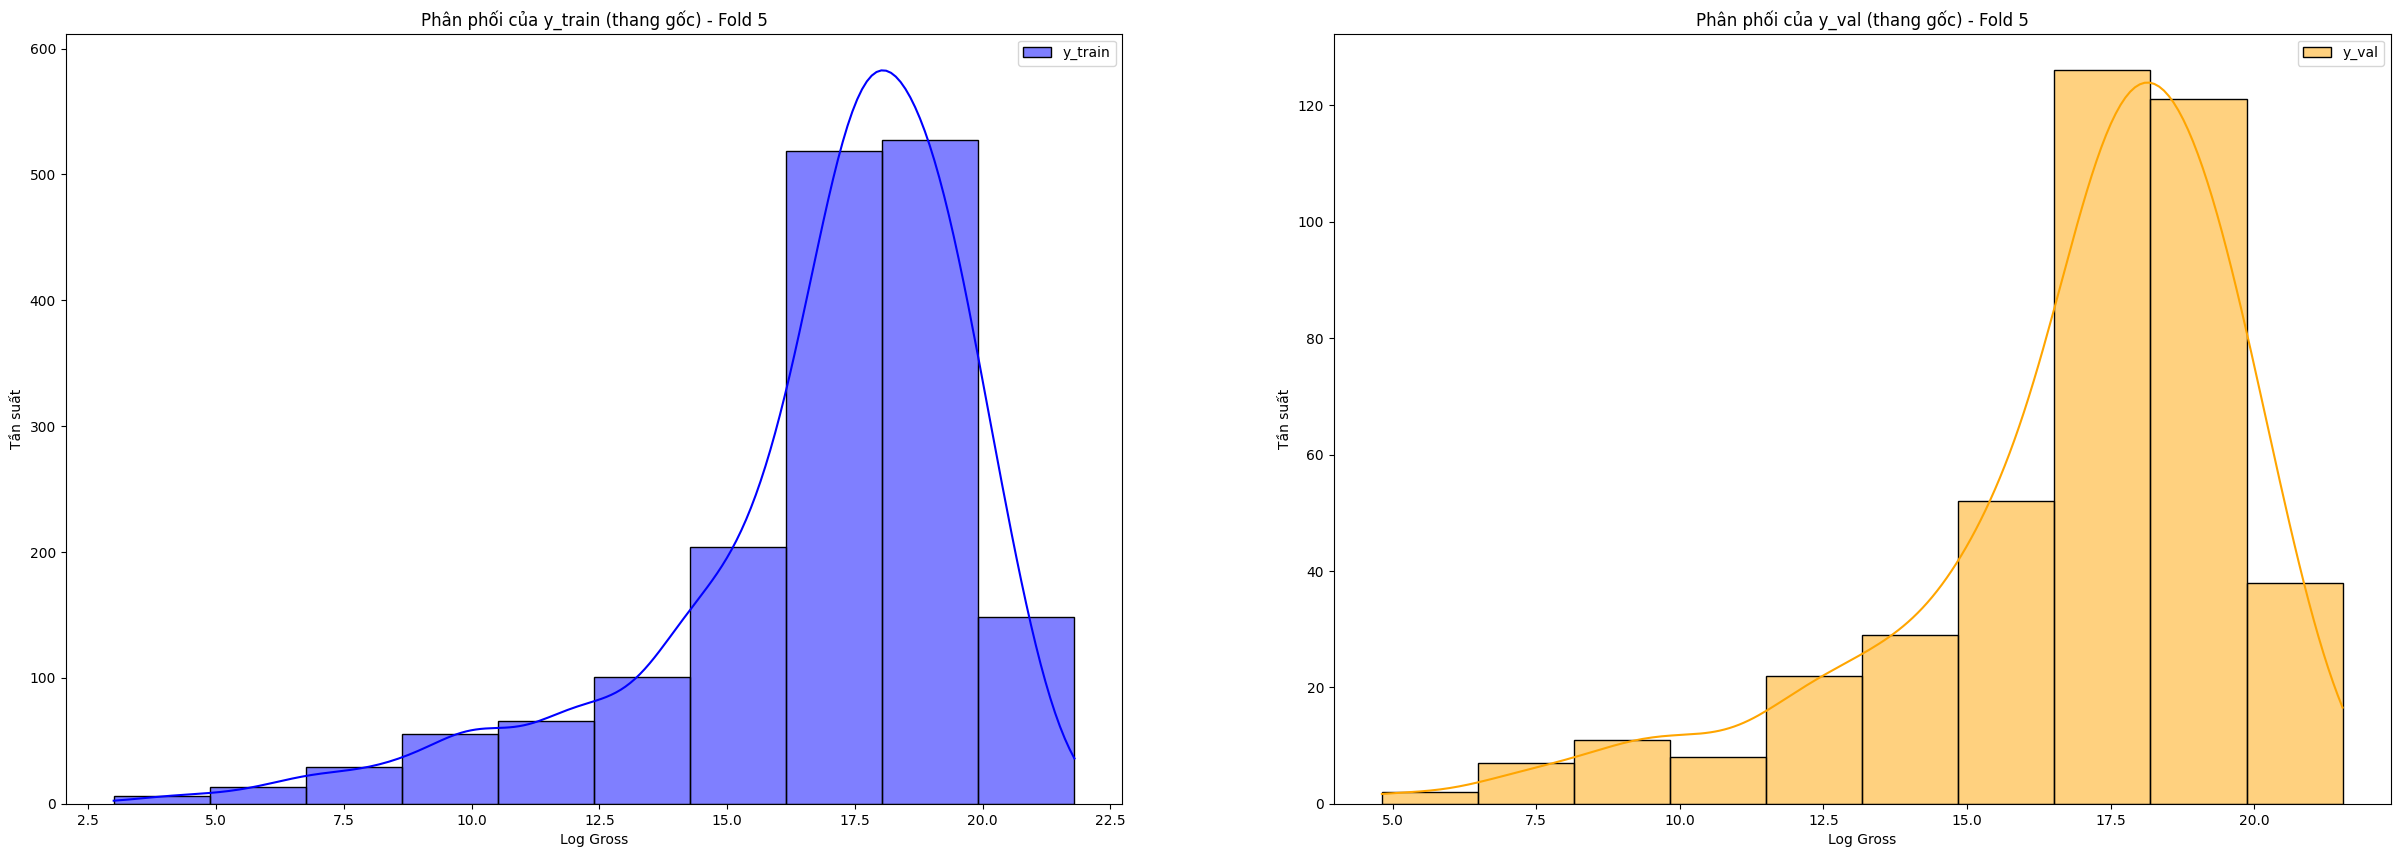

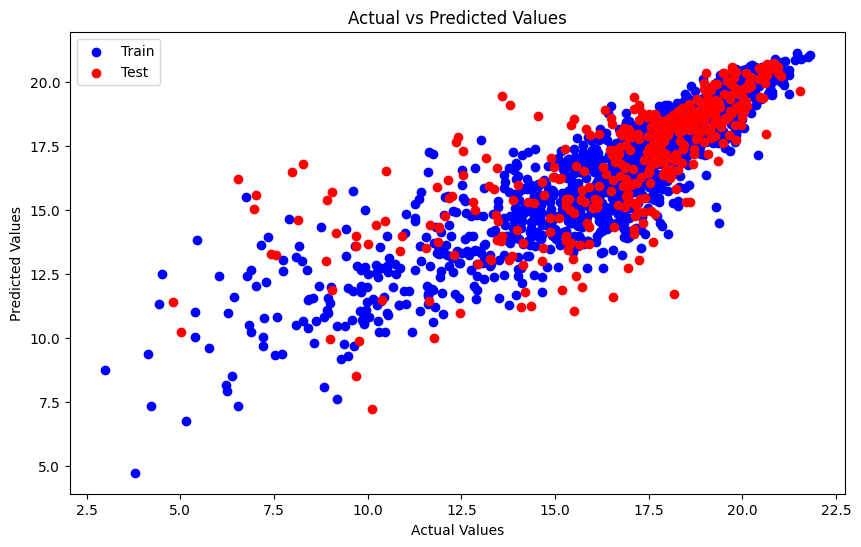

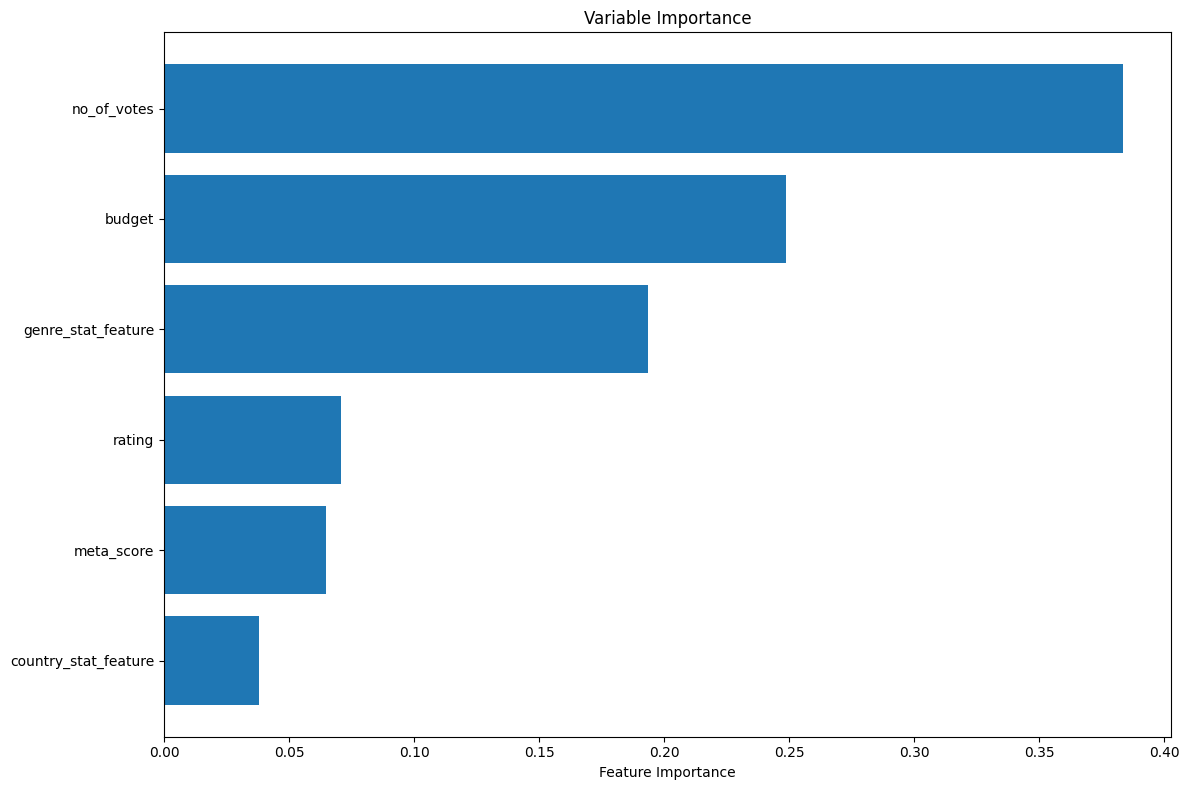

Fold 5 completed.


In [13]:
#Khởi tạo mảng lưu trữ các chỉ số đánh giá cho từng fold
train_r2_list, train_rmse_list, train_msle_list, train_mape_list = [], [], [], []
test_r2_list, test_rmse_list, test_msle_list, test_mape_list = [], [], [], []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"\n🔁 Fold {fold + 1}")

    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()

    X_train, y_train, X_test, y_test = processing_data(df_train, df_val, fold=fold)

    best_model, best_params = train_best_gb_model(X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

    best_model.fit(X_train, y_train)
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    train_r2, train_mse, train_msle, train_mae, train_mape, test_r2, test_mse, test_msle,test_mae, test_mape = visualize_results(
        y_train, train_preds, y_test, test_preds,
        model=best_model, df=pd.DataFrame(X_train, columns=['meta_score', 'rating', 'no_of_votes', 'budget', 'genre_stat_feature', 'country_stat_feature']),
        is_logged=True
    )

    # Ghi nhận kết quả cho mỗi fold
    train_r2_list.append(train_r2)
    train_rmse_list.append(np.sqrt(train_mse))
    train_msle_list.append(train_msle)
    train_mape_list.append(train_mape)

    test_r2_list.append(test_r2)
    test_rmse_list.append(np.sqrt(test_mse))
    test_msle_list.append(test_msle)
    test_mape_list.append(test_mape)

    print(f"Fold {fold + 1} completed.")

In [14]:
# In trung bình các chỉ số
print("\n📊 Trung bình kết quả qua các folds:")
print(f"Train RMSE: {np.mean(train_rmse_list):.4f}")
print(f"Test  RMSE: {np.mean(test_rmse_list):.4f}")
print(f"Train R²  : {np.mean(train_r2_list):.4f}")
print(f"Test  R²  : {np.mean(test_r2_list):.4f}")
print(f"Train MAPE: {np.mean(train_mape_list):.2f}%")
print(f"Test  MAPE: {np.mean(test_mape_list):.2f}%")


📊 Trung bình kết quả qua các folds:
Train RMSE: 151875119.4940
Test  RMSE: 171708665.5465
Train R²  : 0.6667
Test  R²  : 0.5748
Train MAPE: 26.59%
Test  MAPE: 110.23%
